# Machine Learning

## Support Vector Machine as a Regressor

In [54]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error

In [55]:
# Loading Dataset
df = sns.load_dataset("diamonds")
# Let's have look on the top rows of our dataset
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [56]:
# To check name of the columns
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [57]:
# Get the shape of dataset
df.shape

(53940, 10)

In [58]:
# To get the info of Diamond Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [59]:
# Let's check for missing values in our dataset.
print(df.isnull().sum())

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


In [60]:
# Let's Encode the category column
# Initialize the LabelEncoder
le = LabelEncoder()

# List of categorical columns to encode
categorical_columns = ['cut', 'color', 'clarity']

# Encode each categorical column
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

In [61]:
# Let's again get the info our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [62]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
filtered_df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

In [63]:

# Define features and target variable
X = filtered_df.drop('price', axis=1)
y = filtered_df['price'].values.reshape(-1, 1)  # Reshape y to be 2D

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the feature columns
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Initialize and fit the Support Vector Regressor
svr = SVR()
svr.fit(X_train, y_train.ravel())  # Flatten y_train for fitting

# Make predictions
y_pred = svr.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r_squared}')

Mean Squared Error: 0.003792229747276556
Root Mean Squared Error: 0.06158108270627073
R-squared: 0.9332767724818729


In [64]:
# Create a DataFrame to compare actual vs predicted values
results = pd.DataFrame({
    'Actual': y_test.flatten(),  # Flatten to 1D for display
    'Predicted': y_pred
})

# Print the results
print(results.head(10))  # Display the first 10 rows

     Actual  Predicted
0  0.484901   0.600045
1  0.542269   0.624312
2  0.207407   0.258712
3  0.019209   0.098672
4  0.660898   0.486640
5  0.067232   0.101591
6  0.145020   0.217204
7  0.036082   0.084691
8  0.443887   0.443683
9  0.027256   0.094931


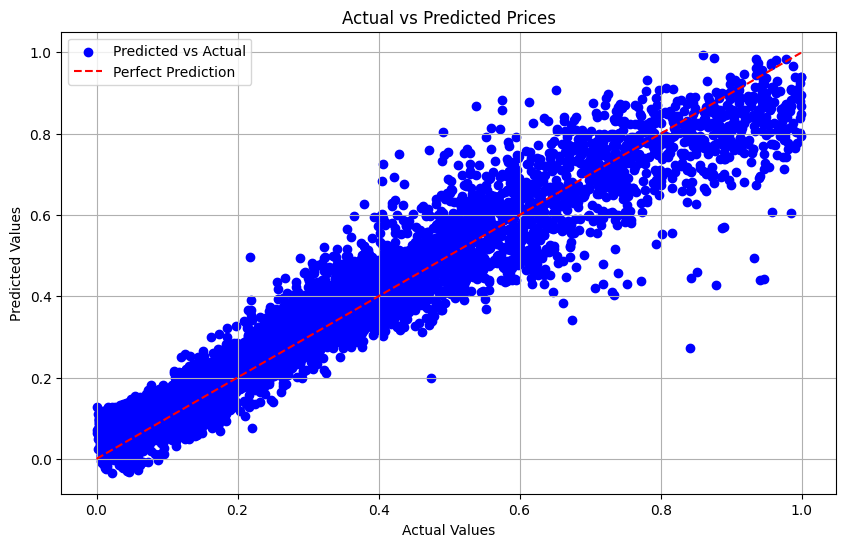

In [65]:


# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.grid()
plt.show()

# SVM as Classifer

In [77]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

In [67]:
# Load Dataset
df = sns.load_dataset("penguins")
# Let's have a look on the top 5 rows of our dataset
print(df.head())

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [68]:
# Let's check the name of columns
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [69]:
# Shape of columns
df.shape

(344, 7)

In [70]:
# Let's get the info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [71]:
# Let's check for missing values in our dataset
print(df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [72]:
# Let's check the percentage of missing values in our dataset
# Let's check for missing values in our dataset
df.isnull().sum() / len(df) * 100


species              0.000000
island               0.000000
bill_length_mm       0.581395
bill_depth_mm        0.581395
flipper_length_mm    0.581395
body_mass_g          0.581395
sex                  3.197674
dtype: float64

In [73]:
# Let's fill the missing values
df["bill_depth_mm"] = df["bill_depth_mm"].fillna(df["bill_depth_mm"].mean())
df["bill_length_mm"] = df["bill_length_mm"].fillna(df["bill_length_mm"].mean())
df["flipper_length_mm"] = df["flipper_length_mm"].fillna(df["flipper_length_mm"].mean())
df["body_mass_g"] = df["body_mass_g"].fillna(df["body_mass_g"].mean())
df["sex"] = df["sex"].fillna(df["sex"].mode()[0])
# Let's again check for missing values
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [74]:
# Let's check the unique and number of uniques values
print(df["species"].unique())
print(df["species"].value_counts())

['Adelie' 'Chinstrap' 'Gentoo']
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


In [78]:
# Define features and target variable
X = df.drop('species', axis=1)
y = df['species']

# Initialize the LabelEncoder for the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode the categorical labels

# Identify categorical columns to encode
categorical_cols = X.select_dtypes(include=['object']).columns

# Create a ColumnTransformer to handle categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)  # One-hot encode categorical features
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Create a pipeline that first transforms the features and then scales them
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', MinMaxScaler())
])

# Fit and transform the features
X_scaled = pipeline.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# Initialize and fit the Support Vector Classifier
svr = SVC()
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       1.00      1.00      1.00        16
           2       1.00      1.00      1.00        21

    accuracy                           1.00        69
   macro avg       1.00      1.00      1.00        69
weighted avg       1.00      1.00      1.00        69

Confusion Matrix:
[[32  0  0]
 [ 0 16  0]
 [ 0  0 21]]


In [79]:
# Create a DataFrame for actual vs predicted values
results = pd.DataFrame({
    'Actual': label_encoder.inverse_transform(y_test),  # Decode back to original labels
    'Predicted': label_encoder.inverse_transform(y_pred)  # Decode predicted labels
})

# Print the results
print(results.head(10))  # Display the first 10 rows

      Actual  Predicted
0  Chinstrap  Chinstrap
1  Chinstrap  Chinstrap
2     Gentoo     Gentoo
3  Chinstrap  Chinstrap
4     Gentoo     Gentoo
5     Gentoo     Gentoo
6     Gentoo     Gentoo
7     Gentoo     Gentoo
8     Adelie     Adelie
9     Gentoo     Gentoo


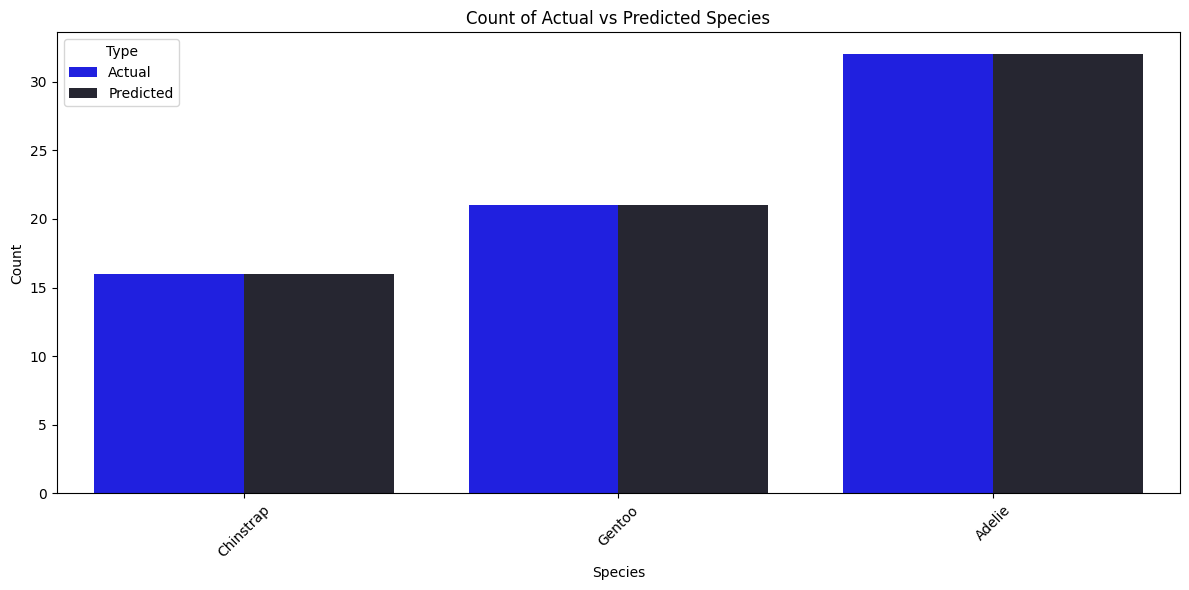

In [82]:

# Melt the DataFrame for easier plotting
results_melted = results.melt(var_name='Type', value_name='Species')

# Set up the plot
plt.figure(figsize=(12, 6))

# Create a count plot with a dark color palette
sns.countplot(data=results_melted, x='Species', hue='Type', palette='dark:blue_r')

# Adding labels and title
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Count of Actual vs Predicted Species')
plt.xticks(rotation=45)
plt.legend(title='Type')

# Show the plot
plt.tight_layout()
plt.show()